### Understanding the rectangle  and trapezoidal method


## 1. Rectangle method

In this method, we calculate the numerical integral by performing a sum of areas of rectangles. 
The integration domain is split into intervals and we act as if the function remains constant over each interval.
- Area of rectangle ABCD
![rectangle](../data/Rectangle_area.png)
- On each interval, we thus carry out the following approximation:
$ \int_{a}^{b} f(x) dx \approx (b-a)f(\alpha) $

where $\alpha$ is an abscisse belonging to the interval limited by $a$ and $b$.

We will limit ourselves here to the cases where $\alpha = a$ or $b$, which means that for each interval we consider as constant the value taken by the function at the left or right end of the interval.

As an example, we will perform an integration program for $\alpha = a$ and we will visualize the rectangles.

To draw a rectangle ABCD (see figure below), simply make a plot with the coordinates of A, B, C, D and A. We end with A to close the plot.

![demo](../data/Rectangle.png)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def compute_integral_rectangle_left(x, y, nbi):
    
    integral =0.
    for i in range(nbi):
        integral = integral + y[i]*(x[i+1]-x[i])
        
    return integral

def plot_integral_left(x, y, nbi):
  
    for i in range(nbi):
        # drawing the rectangle
        x_rect = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
        y_rect = [0   , y[i], y[i]  , 0     , 0   ] # ordonnees des sommets
        plt.plot(x_rect, y_rect,"r")

In [25]:
def compute_integral_rectangle_right(x, y, nbi):
    
    integral =0.
    for i in range(nbi):
        integral = integral + y[i+1]*(x[i+1]-x[i])        
    return integral

def plot_integral_right(x, y, nbi):
  
    for i in range(nbi):
        # drawing the rectangle
        x_rect = [x[i+1], x[i+1], x[i], x[i], x[i+1]] # abscisses des sommets
        y_rect = [0   , y[i+1], y[i+1]  , 0     , 0   ] # ordonnees des sommets
        plt.plot(x_rect, y_rect,"green")

integrale_left = -0.9511435376231573
integrale_right = -1.0473147413044774


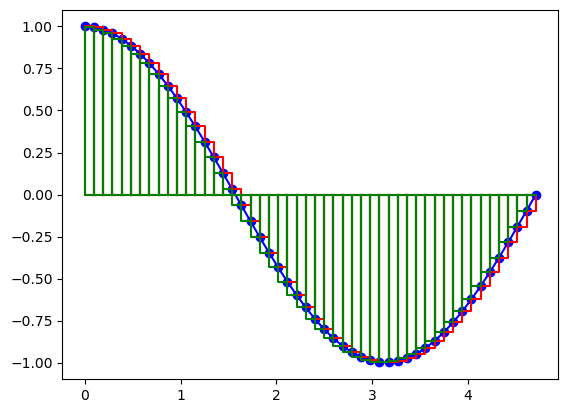

CPU times: total: 531 ms
Wall time: 803 ms


In [44]:
%%time

xmin = 0
xmax = 3*np.pi/2
nbx = 50
nbi = nbx - 1 # nombre d'intervalles

x = np.linspace(xmin, xmax, nbx)
y = np.cos(x)

plt.plot(x,y,"bo-")

integral_left = compute_integral_rectangle_left(x, y, nbi)
integral_right = compute_integral_rectangle_right(x, y, nbi)


plot_integral_left(x, y, nbi)
plot_integral_right(x, y, nbi)
  

print("integrale_left =", integral_left)
print("integrale_right =", integral_right)


plt.show()

## 2. Trapezoidal method

As the name suggests, this integration method uses a sum of trapezoidal areas.

$\textbf{Key idea}$: By using trapezoids we can get more accurate approximations than by using rectangles.
- area of a Trapezoid

![surface](../data/Surface.png)

- On each interval, we then perform the following approximation:
$ \int_{a}^{b} f(x) dx \approx \frac{b-a}{2} [f(a) + f(b)] $
![demo](../../data/Trapeze.png)



In [46]:
def compute_integral_trapezoid(x, y, nbi):
    
    integral =0.
    for i in range(nbi):
        integral = integral + (y[i]+y[i+1])*((x[i+1]-x[i])/2)       
    return integral

def plot_integral_trapezoid(x, y, nbi):
  
    for i in range(nbi):
        # drawing the rectangle
        x_rect = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
        y_rect = [0   , y[i], y[i+1]  , 0     , 0   ] # ordonnees des sommets

        plt.plot(x_rect, y_rect,"r")

integrale_trapezoid = -0.9992291394638173


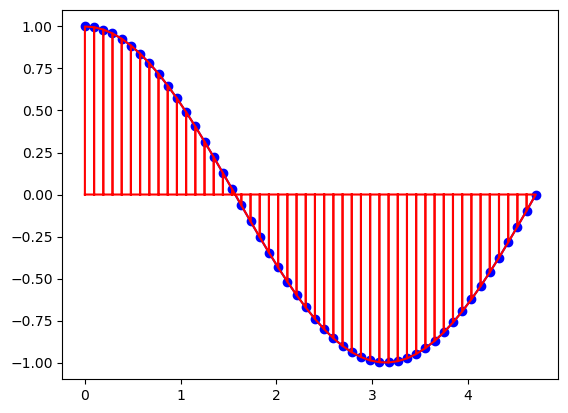

CPU times: total: 234 ms
Wall time: 580 ms


In [48]:
%%time

xmin = 0
xmax = 3*np.pi/2
nbx = 50
nbi = nbx - 1 # nombre d'intervalles

x = np.linspace(xmin, xmax, nbx)
y = np.cos(x)


plt.plot(x,y,"bo-")

integral_trapezoid = compute_integral_trapezoid(x, y, nbi)


plot_integral_trapezoid(x, y, nbi)
  

print("integrale_trapezoid =", integral_trapezoid)


plt.show()